# Exploratory Analysis of Worldwide Compensation Data

## Objective:
To analyze global survey-based salary data, clean missing values, detect outliers using the IQR method, and visualize compensation distributions across respondents and countries.

## Step 1: Install and Import Required Libraries

In [1]:
# Install and import the required libraries
!pip install pandas   # Read and Analyze Data
!pip install matplotlib  # Draw Graphs
!pip install seaborn     # Beautiful Graphs Made Easy

import pandas as pd
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 190.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 200.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 170.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 159.1 MB/s eta 0:00:00


## Step 2: Load the Dataset

In [2]:
# Step 1: Load and Explore the Dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 2: Set pandas option to display all columns
pd.set_option('display.max_columns', None)

#Step 3: Display the top 10 records
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [3]:
# Step 4: Check the Size of the Dataset (Rows and Columns)
df.shape

(65437, 114)

#### ** * The dataset has been loaded successfully with 65437 Rows and 114 Columns.

In [4]:
# Step 5: Display Column Names as a Clean List
for i, col in enumerate(df.columns, start=1):
    print(f"{i}. {col}")

1. ResponseId
2. MainBranch
3. Age
4. Employment
5. RemoteWork
6. Check
7. CodingActivities
8. EdLevel
9. LearnCode
10. LearnCodeOnline
11. TechDoc
12. YearsCode
13. YearsCodePro
14. DevType
15. OrgSize
16. PurchaseInfluence
17. BuyNewTool
18. BuildvsBuy
19. TechEndorse
20. Country
21. Currency
22. CompTotal
23. LanguageHaveWorkedWith
24. LanguageWantToWorkWith
25. LanguageAdmired
26. DatabaseHaveWorkedWith
27. DatabaseWantToWorkWith
28. DatabaseAdmired
29. PlatformHaveWorkedWith
30. PlatformWantToWorkWith
31. PlatformAdmired
32. WebframeHaveWorkedWith
33. WebframeWantToWorkWith
34. WebframeAdmired
35. EmbeddedHaveWorkedWith
36. EmbeddedWantToWorkWith
37. EmbeddedAdmired
38. MiscTechHaveWorkedWith
39. MiscTechWantToWorkWith
40. MiscTechAdmired
41. ToolsTechHaveWorkedWith
42. ToolsTechWantToWorkWith
43. ToolsTechAdmired
44. NEWCollabToolsHaveWorkedWith
45. NEWCollabToolsWantToWorkWith
46. NEWCollabToolsAdmired
47. OpSysPersonal use
48. OpSysProfessional use
49. OfficeStackAsyncHaveWorke

In [5]:
# Step 6: Examine Dataset Structure and Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### Key Insights:
* 65,437 rows and 114 columns
* Mostly categorical (object) data
* 14 numerical features
* Uses about 57 MB of memory

## Step 3: Analyze and Visualize Compensation Distribution
* Task: Plot the distribution and histogram for ConvertedCompYearly to examine the spread of yearly compensation among respondents.

In [6]:
# Step 1:Understand the Column
df['ConvertedCompYearly'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ConvertedCompYearly, dtype: float64

In [7]:
# Step 2: Missing Values
df['ConvertedCompYearly'].isna().sum()

np.int64(42002)

In [8]:
# Step 3: Identify unrealistic entries (Zero or Negative Values)
(df['ConvertedCompYearly'] <= 0).sum()

np.int64(0)

### Key Insights:
* 42,002 missing values in ConvertedCompYearly
* No zero or negative values detected
* Salary data is positive but incomplete

In [9]:
# Step 4:  Remove Missing Values
comp_df = df.dropna(subset=['ConvertedCompYearly'])

# verify
comp_df['ConvertedCompYearly'].isna().sum()

np.int64(0)

In [10]:
# Step 5: Calculate basic statistics (mean, median, and standard deviation) for ConvertedCompYearly.
#  Basic Distribution Shape
comp_df['ConvertedCompYearly'].describe().round(0).astype(int)

count       23435
mean        86155
std        186757
min             1
25%         32712
50%         65000
75%        107972
max      16256603
Name: ConvertedCompYearly, dtype: int64

### Key Insights:

* 23,435 respondents reported their yearly salary.
* The average salary is 86155.
* The middle salary (median) is 65,000.
* Most salaries fall between 32,712 and 107,972.
* The minimum value is 1.
* The maximum value is 16.2 million, showing extreme outliers.
* The large standard deviation (186,757) shows salaries vary widely.

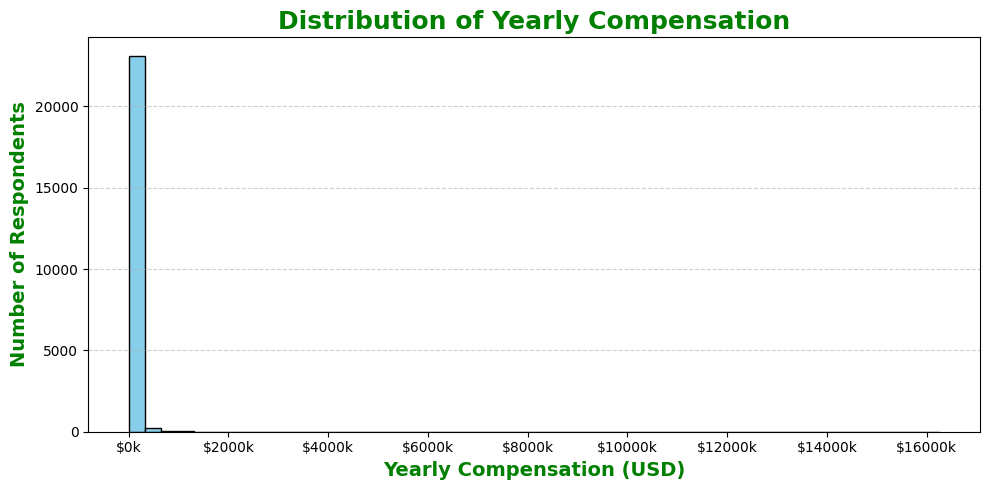

In [11]:
# Step 6: Histogram of Yearly Salary Distribution
import matplotlib.ticker as ticker # control how axis numbers are displayed in Matplotlib plots.

plt.figure(figsize=(10,5))

plt.hist(comp_df['ConvertedCompYearly'], 
         bins=50, 
         color='skyblue', 
         edgecolor='black')

plt.title('Distribution of Yearly Compensation', fontsize=18, fontweight='bold', color="green")
plt.xlabel('Yearly Compensation (USD)',fontsize=14,color="green", fontweight='bold')
plt.ylabel('Number of Respondents',fontsize=14,color="green", fontweight='bold')

# Format x-axis as $K to avoid scientific notation
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}k')
)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Key Insights:
The histogram shows that most salaries are concentrated near the lower end of the scale, while a few extremely high salaries stretch the x-axis, making normal salary ranges difficult to distinguish.

## Step 4: Calculate Median Compensation for Full-Time Employees
Task: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."

In [12]:
# Step 1: Confirm the employment column exists and is categorical
df['Employment'].dtype

dtype('O')

The Employment column contains categorical text data and is ready for filtering full-time respondents.

In [13]:
# Step 2: Check missing values in Employment
df['Employment'].isna().sum()

np.int64(0)

The Employment column has no missing values, so all respondents have a recorded employment status.

In [14]:

# Step 3: Filter respondents who are employed full-time
full_time_df = comp_df[comp_df['Employment'] == 'Employed, full-time']

# Calculate median yearly compensation
median_full_time_salary = full_time_df['ConvertedCompYearly'].median()

print("Median Yearly Compensation for Full-Time Employees: $", round(median_full_time_salary, 0))


Median Yearly Compensation for Full-Time Employees: $ 69814.0


In [15]:
# Step 4: Check data size after filtering
full_time_df.shape[0]

17586

### Key Insights:
* 17,586 respondents are employed full-time
* The median yearly compensation for full-time employees is $69,814

## Step 5: Analyzing Compensation Range and Distribution by Country
Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.

In [16]:
# Step 1: Check Country column availability
df['Country'].dtype

dtype('O')

In [17]:
# Step 2: Check missing values in Country
df['Country'].isna().sum()

np.int64(6507)

* The Country column is text data (dtype('O')), so it is categorical
* There are 6,507 missing country values

In [18]:
# Step 3: To see the number of unique countries
comp_df['Country'].nunique()

166

In [19]:
# Step 4: Remove rows with missing Country or Salary
country_df = comp_df.dropna(subset=['Country', 'ConvertedCompYearly'])

# verify
country_df[['Country' ,'ConvertedCompYearly']].isna().sum()

Country                0
ConvertedCompYearly    0
dtype: int64

In [20]:
# Step 5: Select Top 10 Countries
top_countries = country_df['Country'].value_counts().head(10).index
top_countries

Index(['United States of America', 'Germany', 'Ukraine',
       'United Kingdom of Great Britain and Northern Ireland', 'India',
       'France', 'Canada', 'Brazil', 'Poland', 'Netherlands'],
      dtype='object', name='Country')

In [21]:
# Step 6: Prepare Data for Boxplot
country_salary_data = [
                      country_df[country_df['Country']== country]['ConvertedCompYearly']
                      for country in top_countries ]


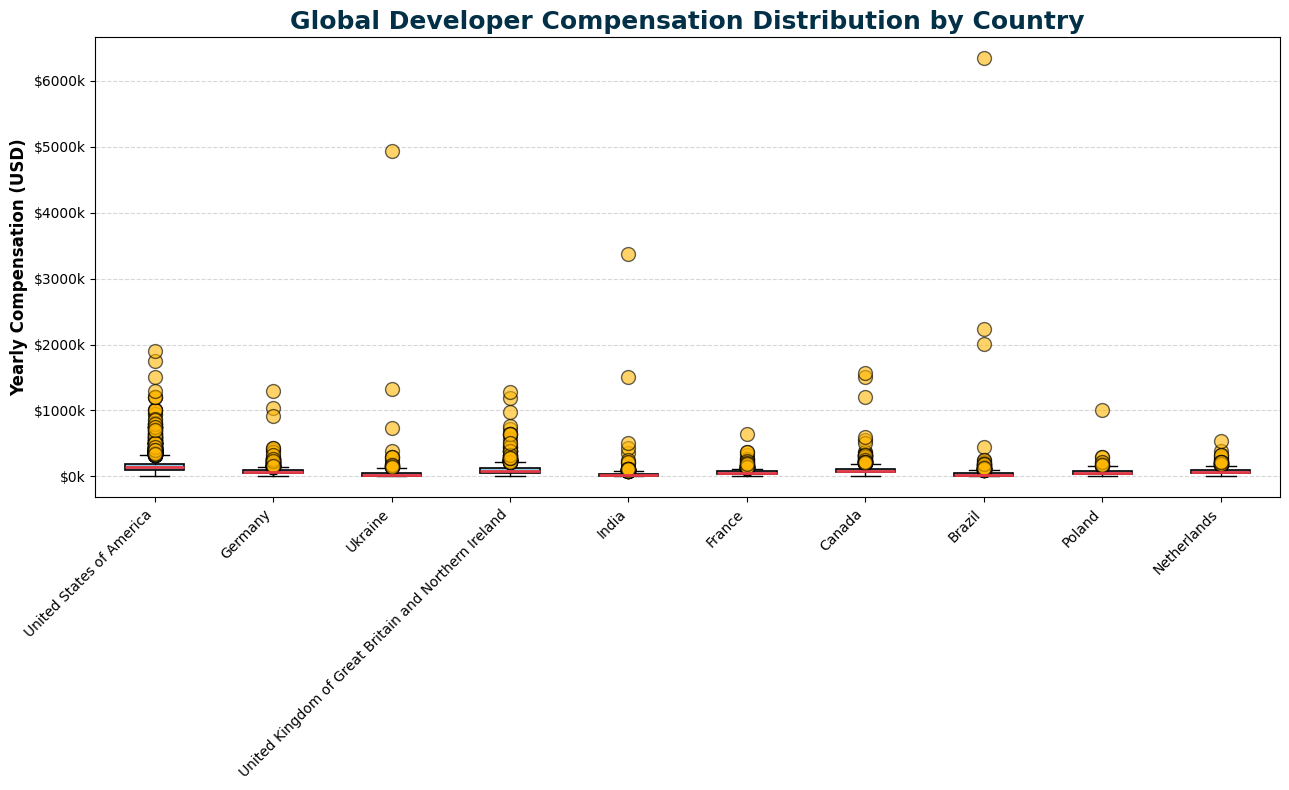

In [22]:
# Step 7: Plot Boxplot for Global Compensation Distribution by Country
import matplotlib.ticker as ticker

plt.figure(figsize=(13,8))

plt.boxplot(
    country_salary_data,
    tick_labels=top_countries,   # <- fixes the Matplotlib warning
    patch_artist=True,
    boxprops=dict(facecolor='#8ecae6', edgecolor='black', linewidth=1.2),
    medianprops=dict(color='#e63946', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', markerfacecolor='#ffb703', markersize=10, alpha=0.6)
)

# Title and labels
plt.title('Global Developer Compensation Distribution by Country',
          fontsize=18, fontweight='bold', color='#023047')

plt.ylabel('Yearly Compensation (USD)', fontsize=12, fontweight='bold')

# Format Y-axis as $K
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}k')
)

# Rotate country labels
plt.xticks(rotation=45, ha='right')

# Light grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### Key Insights:
* Salaries vary significantly across countries
* The United States shows the highest median salaries and the widest salary range
* Countries like Germany, UK, and Canada show moderate median salaries
* Countries such as India, Brazil, and Poland have lower median salaries
* Several extreme outliers exist in each country, representing very high earners

## Step 6: Removing Outliers from the Dataset
Task: Create a new DataFrame by removing outliers from the ConvertedCompYearly column to get a refined dataset for correlation analysis.

In [23]:
df['ConvertedCompYearly'].isna().sum()

np.int64(42002)

In [24]:
# Step 1: Ensure salary column is numeric and remove missing values
comp_df = df[['ConvertedCompYearly']].dropna()


# Verify
comp_df.isna().sum()

ConvertedCompYearly    0
dtype: int64

In [25]:
# Step 2: Calculate Q1, Q3, and IQR
Q1 = comp_df['ConvertedCompYearly'].quantile(0.25)
Q3 = comp_df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)


Q1: 32712.0
Q3: 107971.5
IQR: 75259.5


### Key Insights:
* Q1: $32,712 → 25% earn below this
  
* Q3: $107,972 → 75% earn below this
 
* IQR: $75,260 → Middle 50% of salaries lie in this range

In [26]:
# Step 3: Define Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -80177.25
Upper Bound: 220860.75


In [27]:
# Step 4: Identify Outliers
iqr_outliers = comp_df[
    (comp_df['ConvertedCompYearly'] < lower_bound) |
    (comp_df['ConvertedCompYearly'] > upper_bound)
]

print("Number of outliers detected:", iqr_outliers.shape[0])


Number of outliers detected: 978


### Key Insights:
* The lower bound is negative, so there are no low-end salary outliers.
* The upper bound is $220,860, meaning salaries above this are unusually high.
* A total of 978 high-end salary outliers were detected, confirming the data is right-skewed with a small group of very high earners.

In [28]:
# Step 5: Remove Outliers and Create Refined Dataset
comp_df_no_outliers = comp_df[
    (comp_df['ConvertedCompYearly'] >= lower_bound) &
    (comp_df['ConvertedCompYearly'] <= upper_bound)
]

print("Original dataset size:", comp_df.shape[0])
print("Refined dataset size:", comp_df_no_outliers.shape[0])


Original dataset size: 23435
Refined dataset size: 22457


Outliers in yearly compensation were detected using the IQR method and removed to create a refined dataset for further analysis.